## **Instalación de librerias**

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
import plotly.express as px
from collections import defaultdict
import numpy as np
import os

## **Mapa**


In [5]:
!pip install folium

In [6]:
import folium
from folium.plugins import BeautifyIcon

# Coordenadas originales de estaciones meteorológicas
estaciones_meteo = {
    "baron": (-33.0426, -71.6043),
    "curauma": (-33.1307, -71.5610),
    "la cruz": (-32.8238, -71.2268),
    "los andes": (-32.8331, -70.5946)
}

# Coordenadas de subestaciones
subestaciones = {
    "S/E CALERA CENTRO": (-32.787, -71.206),
    "S/E CONCON": (-32.936, -71.511),
    "S/E LOS PLACERES": (-33.036, -71.551),
    "S/E PLACILLA (CHILQUINTA)": (-33.092, -71.569),
    "S/E PLAYA ANCHA": (-33.060, -71.639),
    "S/E SAN FELIPE": (-32.751, -70.720),
    "S/E SAN RAFAEL (CHILQUINTA)": (-32.836, -70.621),
    "S/E VALPARAISO": (-33.045, -71.612),
    "S/E BOSQUEMAR": (-33.028, -71.513)
}

# Relación estación meteorológica ↔ subestaciones
relacion_meteo = {
    "baron": ["S/E CONCON", "S/E LOS PLACERES", "S/E PLAYA ANCHA", "S/E VALPARAISO", "S/E BOSQUEMAR"],
    "curauma": ["S/E PLACILLA (CHILQUINTA)"],
    "la cruz": ["S/E CALERA CENTRO"],
    "los andes": ["S/E SAN FELIPE", "S/E SAN RAFAEL (CHILQUINTA)"]
}

# Colores por estación meteorológica
colores = {
    "baron": "blue",
    "curauma": "green",
    "la cruz": "orange",
    "los andes": "red"
}

# Crear el mapa
m = folium.Map(location=[-33.0, -71.4], zoom_start=9)

# Agregar estaciones meteorológicas con ícono circular más pequeño
for nombre, (lat, lon) in estaciones_meteo.items():
    folium.Marker(
        location=(lat, lon),
        popup=f"Estación Meteorológica: {nombre}",
        icon=BeautifyIcon(
            icon_shape='circle',
            number='M',
            border_color=colores[nombre],
            background_color=colores[nombre],
            text_color='white',
            border_width=1,
            radius=10
        )
    ).add_to(m)

# Agregar subestaciones con círculos
for meteo, subs in relacion_meteo.items():
    for sub in subs:
        lat, lon = subestaciones[sub]
        folium.CircleMarker(
            location=(lat, lon),
            radius=6,
            color=colores[meteo],
            fill=True,
            fill_color=colores[meteo],
            popup=sub
        ).add_to(m)

# Guardar el mapa
m.save("mapa_subestaciones_meteo.html")



## **Datos meteorologicos - Baron**

In [8]:
import pandas as pd
import csv

# Archivos con comillas dobles - años 2021, 2022, 2023
archivos_tipo1 = [
    "Chilquinta_Barn_12-31-21_11-00_PM_1_Year_1746453881_v2.csv",
    "Chilquinta_Barn_12-31-22_11-00_PM_1_Year_1746453908_v2.csv",
    "Chilquinta_Barn_12-31-23_11-00_PM_1_Year_1746453932_v2.csv"
]

# Archivo otro formato
archivos_tipo2 = [
    "Chilquinta_Barn_12-31-24_11-00_PM_6_Month_1744132999_v2.csv"
]

# Función para leer archivos tipo1 (elimina comillas dobles y simples)
def leer_csv_tipo1(path):
    with open(path, "r", encoding="latin1") as f:
        rows = [
            list(csv.reader([
                line.replace('""', '"')    # reemplaza comillas dobles dobles
                    .replace("'", "")      # elimina comillas simples
                    .strip()
                    .strip('"')            # elimina comillas dobles de borde
            ]))[0]
            for line in f
        ]
    return pd.DataFrame(rows[1:], columns=rows[0])  # primera fila como encabezado

# Leer y unir archivos tipo1
df_tipo1 = pd.concat([leer_csv_tipo1(p) for p in archivos_tipo1], ignore_index=True)

# Leer y unir archivos tipo2 (CSV delimitado por punto y coma)
df_tipo2 = pd.concat([
    pd.read_csv(p, sep=';', encoding='latin1', engine='python', skipinitialspace=True)
    for p in archivos_tipo2
], ignore_index=True)

# Normalizar nombres de columnas
df_tipo1.columns = df_tipo1.columns.str.strip()
df_tipo2.columns = df_tipo2.columns.str.strip()

# Renombrar columna mal escrita en df_tipo1
df_tipo1.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# Renombrar columna mal escrita en df_tipo2
df_tipo2.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# Asegurar que ambos dataframes tienen las mismas columnas
for col in df_tipo2.columns:
    if col not in df_tipo1.columns:
        df_tipo1[col] = pd.NA
for col in df_tipo1.columns:
    if col not in df_tipo2.columns:
        df_tipo2[col] = pd.NA

# Reordenar columnas de tipo1 según las de tipo2
df_tipo1 = df_tipo1[df_tipo2.columns]

# Concatenar todo respetando el orden cronológico
df_baron = pd.concat([df_tipo1, df_tipo2], ignore_index=True)

# Mostrar todas las columnas en la vista
pd.set_option('display.max_columns', None)

# Mostrar primeras filas
print(df_baron.head())

        Date & Time Temperatura interior - °C  \
0  7/26/22 11:00 AM                        24   
1  7/26/22 11:15 AM                        24   
2  7/26/22 11:30 AM                        23   
3  7/26/22 11:45 AM                        21   
4  7/26/22 12:00 PM                        21   

  Máxima Temperatura Interior - °C Mínima de Temp Interior - °C  \
0                               26                           24   
1                               26                           24   
2                               25                           23   
3                               22                           21   
4                               21                           20   

  Dentro de Hum - % Máxima de Hum Interior - % Mínima de Hum Interior - %  \
0                40                         40                         36   
1                41                         42                         37   
2                46                         46                         

In [10]:
from datetime import datetime

possible_formats = [
    "%m/%d/%Y %H:%M:%S",
    "%m/%d/%y %I:%M %p",
    "%m/%d/%Y %I:%M %p",
    "%m/%d/%y %H:%M:%S",
    "%m/%d/%y",
    "%m/%d/%Y",
    "%m/%d/%Y %H:%M",
    "%Y-%m-%d %H:%M:%S",
    "%Y-%m-%d %H:%M",
    "%m-%d-%Y %H:%M"
]


def parse_mixed_datetime(date_str):
    for fmt in possible_formats:
        try:
            return datetime.strptime(str(date_str).strip(), fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

df_baron["Date & Time"] = df_baron["Date & Time"].apply(parse_mixed_datetime)

# Redondear hacia el intervalo más cercano de 15 minutos
df_baron["Date & Time"] = df_baron["Date & Time"].dt.floor("15min")


In [11]:
# Convertir las columnas de fecha a formato datetime
df_baron['Date & Time'] = pd.to_datetime(df_baron['Date & Time'], errors='coerce')

In [12]:
columnas_excluidas = ["Date & Time", "Dirección del Viento Predominante", "Alta Dirección del viento"]

# Convertir solo las columnas que no están en la lista excluida
for col in df_baron.columns:
    if col not in columnas_excluidas:
        df_baron[col] = pd.to_numeric(df_baron[col], errors='coerce')


In [13]:
# Ver si hay valores nulos
df_baron.isnull().sum()

Date & Time                                        0
Temperatura interior - °C                          0
Máxima Temperatura Interior - °C                   0
Mínima de Temp Interior - °C                       0
Dentro de Hum - %                                  0
Máxima de Hum Interior - %                         0
Mínima de Hum Interior - %                         0
Dentro del punto de rocío - °C                     0
Dentro de índice de calor - °C                     0
Barómetro - mb                                     0
Máxima de Presión Atmosférica - mb                 0
Mínima de Presión Atmosférica - mb                 0
Presión Absoluta - mb                              0
Temp - °C                                          1
Temp. Alta - °C                                    1
Temp. Baja - °C                                    1
Hum - %                                            1
Alta Hum - %                                       1
Hum Baja - %                                  

In [14]:
# Mostrar los valores duplicados únicos
valores_duplicados = df_baron["Date & Time"][df_baron["Date & Time"].duplicated()].unique()

print("\nValores que están duplicados:")
print(valores_duplicados)


Valores que están duplicados:
<DatetimeArray>
['2023-01-01 00:00:00', '2024-01-01 00:00:00', '2025-01-01 00:00:00']
Length: 3, dtype: datetime64[ns]


In [15]:
df_baron = df_baron.drop_duplicates(subset="Date & Time").reset_index(drop=True)


In [16]:
df_baron.to_csv('df_baron.csv', index=False)

## **Datos metorologicos - Curauma**

In [18]:
import pandas as pd
import csv

# Archivos con comillas dobles
archivos_tipo1 = [
    "Chilquinta_Curauma_12-31-21_11-00_PM_1_Year_1746453262_v2.csv",
    "Chilquinta_Curauma_12-31-22_11-00_PM_1_Year_1746453291_v2.csv",
    "Chilquinta_Curauma_12-31-23_11-00_PM_1_Year_1746453319_v2.csv"
]

# Archivo otro formato
archivos_tipo3 = [
    "Chilquinta_Curauma_2025.xlsx"
]

# Leer archivos tipo1 
def leer_csv_tipo1(path):
    with open(path, "r", encoding="latin1") as f:
        rows = [
            list(csv.reader([
                line.replace('""', '"')    # reemplazar comillas dobles dobles
                    .replace("'", "")      # eliminar comillas simples
                    .strip()
                    .strip('"')            # eliminar comillas dobles de borde
            ]))[0]
            for line in f
        ]
    return pd.DataFrame(rows[1:], columns=rows[0])  # primera fila como encabezado

# Leer y unir archivos tipo1
df_tipo1 = pd.concat([leer_csv_tipo1(p) for p in archivos_tipo1], ignore_index=True)


df_tipo3 = pd.concat([
    pd.read_excel(p, engine="openpyxl", dtype={"Date & Time": str}).astype(str)
    for p in archivos_tipo3
], ignore_index=True)


# Normalizar nombres de columnas
df_tipo1.columns = df_tipo1.columns.str.strip()
df_tipo3.columns = df_tipo3.columns.str.strip()

# Renombrar columna mal escrita en df_tipo1
df_tipo1.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# Renombrar columna mal escrita en df_tipo3
df_tipo3.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

#Asegurar que ambos dataframes tienen las mismas columnas
for col in df_tipo3.columns:
    if col not in df_tipo1.columns:
        df_tipo1[col] = pd.NA
for col in df_tipo1.columns:
    if col not in df_tipo3.columns:
        df_tipo3[col] = pd.NA

# Reordenar columnas de tipo1 según las de tipo3
df_tipo1 = df_tipo1[df_tipo3.columns]

# Concatenar todo respetando el orden cronológico
df_curauma = pd.concat([df_tipo1, df_tipo3], ignore_index=True)

# Limpieza específica de columna 'Date & Time'
if "Date & Time" in df_curauma.columns:
    df_curauma["Date & Time"] = df_curauma["Date & Time"].str.strip().str.strip("'").str.strip('"')

# Mostrar todas las columnas en la vista
pd.set_option('display.max_columns', None)

# Mostrar primeras filas
print(df_curauma.head())

       Date & Time Temperatura interior - °C Máxima Temperatura Interior - °C  \
0  4/18/22 5:30 PM                        15                               15   
1  4/18/22 5:45 PM                        16                               16   
2  4/18/22 6:00 PM                        16                               16   
3  4/18/22 6:15 PM                        16                               16   
4  4/18/22 6:30 PM                        15                               16   

  Mínima de Temp Interior - °C Dentro de Hum - % Máxima de Hum Interior - %  \
0                           13                69                         77   
1                           15                66                         69   
2                           16                66                         66   
3                           16                66                         66   
4                           15                68                         68   

  Mínima de Hum Interior - % Dentro de

In [20]:
# Ver si hay valores nulos
df_curauma.isnull().sum()

Date & Time                                      0
Temperatura interior - °C                        0
Máxima Temperatura Interior - °C                 0
Mínima de Temp Interior - °C                     0
Dentro de Hum - %                                0
Máxima de Hum Interior - %                       0
Mínima de Hum Interior - %                       0
Dentro del punto de rocío - °C                   0
Dentro de índice de calor - °C                   0
Barómetro - mb                                   0
Máxima de Presión Atmosférica - mb               0
Mínima de Presión Atmosférica - mb               0
Presión Absoluta - mb                            0
Temp - °C                                        0
Temp. Alta - °C                                  0
Temp. Baja - °C                                  0
Hum - %                                          0
Alta Hum - %                                     0
Hum Baja - %                                     0
Punto de rocío - °C            

In [21]:
from datetime import datetime

# Lista de formatos válidos
possible_formats = [
    "%m/%d/%Y %H:%M",
    "%m/%d/%Y %H:%M:%S",
    "%m/%d/%y %I:%M %p",
    "%m/%d/%Y %I:%M %p",
    "%m/%d/%y %H:%M:%S",
    "%m/%d/%y",
    "%m/%d/%Y",
    "%m-%d-%Y %H:%M",
    "%Y-%m-%d %H:%M:%S" ,  
    "%Y-%d-%m %H:%M:%S" 

]

# Función de parsing
def parse_mixed_datetime(date_str):
    for fmt in possible_formats:
        try:
            return datetime.strptime(str(date_str).strip(), fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT


def corregir_formato_yyyy_dd_mm(fecha_str):
    try:
        parts = fecha_str.strip().split(" ")
        fecha, hora = parts[0], parts[1]
        y, d, m = fecha.split("-")
        return f"{y}-{m}-{d} {hora}"
    except:
        return fecha_str 

# Limpieza previa
df_curauma["Date & Time"] = (
    df_curauma["Date & Time"]
    .astype(str)
    .str.strip()
    .str.strip("'")
    .str.replace("’", "", regex=False)
    .str.replace("‘", "", regex=False)
    .str.replace('"', "", regex=False)
)

df_curauma["Date & Time"] = df_curauma["Date & Time"].astype(str).apply(corregir_formato_yyyy_dd_mm)

# Aplicar parsing
df_curauma["Date & Time"] = df_curauma["Date & Time"].apply(parse_mixed_datetime)

# Redondear a 15 minutos
df_curauma["Date & Time"] = df_curauma["Date & Time"].dt.floor("15min")


In [22]:
columnas_excluidas = ["Date & Time", "Dirección del Viento Predominante", "Alta Dirección del viento"]

# Convertir solo las columnas que no están en la lista excluida
for col in df_curauma.columns:
    if col not in columnas_excluidas:
        df_curauma[col] = pd.to_numeric(df_curauma[col], errors='coerce')


In [24]:
# Mostrar los valores duplicados únicos
valores_duplicados = df_curauma["Date & Time"][df_curauma["Date & Time"].duplicated()].unique()

print("\nValores que están duplicados:")
print(valores_duplicados)


Valores que están duplicados:
<DatetimeArray>
['2024-01-01 00:00:00', '2025-01-01 00:00:00']
Length: 2, dtype: datetime64[ns]


In [25]:
df_curauma = df_curauma.drop_duplicates(subset="Date & Time").reset_index(drop=True)

In [26]:
df_curauma.to_csv('df_curauma.csv', index=False)

## **Datos meteorologicos - La Cruz**

In [28]:
import pandas as pd
import csv

# Archivos CSV tipo1 (años 2022, 2023, 2024)
archivos_tipo1 = [
    "La_Cruz__12-31-22_11-00_PM_1_Year_1746455520_v2.csv",
    "La_Cruz__12-31-23_11-00_PM_1_Year_1746455548_v2.csv",
    "La_Cruz__12-31-24_11-00_PM_1_Year_1746455558_v2.csv"
]

# Función para leer archivos tipo1
def leer_csv_tipo1(path):
    with open(path, "r", encoding="latin1") as f:
        rows = [
            list(csv.reader([
                line.replace('""', '"')    
                    .replace("'", "")      
                    .strip()
                    .strip('"')            
            ]))[0]
            for line in f
        ]
    return pd.DataFrame(rows[1:], columns=rows[0])  # primera fila como encabezado

# Leer y unir archivos tipo1
df_tipo1 = pd.concat([leer_csv_tipo1(p) for p in archivos_tipo1], ignore_index=True)


# Normalizar nombres de columnas
df_tipo1.columns = df_tipo1.columns.str.strip()

# Renombrar columna mal escrita
df_tipo1.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# crear df
df_lacruz = df_tipo1.copy()                  

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar primeras filas
print(df_lacruz.head())

       Date & Time Barómetro - mb Máxima de Presión Atmosférica - mb  \
0  6/23/23 1:15 PM         1020.6                             1020.6   
1  6/23/23 1:30 PM         1020.3                             1020.7   
2  6/23/23 1:45 PM         1020.1                             1020.4   
3  6/23/23 2:00 PM         1019.7                             1020.1   
4  6/23/23 2:15 PM         1019.5                             1019.7   

  Mínima de Presión Atmosférica - mb Presión Absoluta - mb Temp - °C  \
0                             1020.6                 999.0        --   
1                             1020.3                 998.7        17   
2                             1020.1                 998.5        17   
3                             1019.7                 998.1        17   
4                             1019.5                 997.9        17   

  Temp. Alta - °C Temp. Baja - °C Hum - % Alta Hum - % Hum Baja - %  \
0              --              --      --           --         

In [29]:
# Ver si hay valores nulos
df_lacruz.isnull().sum()

Date & Time                                      0
Barómetro - mb                                   0
Máxima de Presión Atmosférica - mb               0
Mínima de Presión Atmosférica - mb               0
Presión Absoluta - mb                            0
Temp - °C                                        0
Temp. Alta - °C                                  0
Temp. Baja - °C                                  0
Hum - %                                          0
Alta Hum - %                                     0
Hum Baja - %                                     0
Punto de rocío - °C                              0
Máxima del Punto de Rocío - °C                   0
Mínima del Punto de Rocío - °C                   0
Bulbo Húmedo - °C                                0
Máxima Temperatura de Bulbo Húmedo - °C          0
Mínima de la Temperatura de Bulbo Húmedo - °C    0
Velocidad del Viento Media - km/h                0
Dirección del Viento Predominante                0
Alta velocidad del viento - km/

In [30]:
from datetime import datetime

# Lista de formatos válidos
possible_formats = [
    "%m/%d/%Y %H:%M",
    "%m/%d/%Y %H:%M:%S",
    "%m/%d/%y %I:%M %p",
    "%m/%d/%Y %I:%M %p",
    "%m/%d/%y %H:%M:%S",
    "%m/%d/%y",
    "%m/%d/%Y",
    "%m-%d-%Y %H:%M",
    "%Y-%m-%d %H:%M:%S" ,  
    "%Y-%d-%m %H:%M:%S" 

]

# Función de parsing
def parse_mixed_datetime(date_str):
    for fmt in possible_formats:
        try:
            return datetime.strptime(str(date_str).strip(), fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT


def corregir_formato_yyyy_dd_mm(fecha_str):
    try:
        parts = fecha_str.strip().split(" ")
        fecha, hora = parts[0], parts[1]
        y, d, m = fecha.split("-")
        return f"{y}-{m}-{d} {hora}"
    except:
        return fecha_str
        
df_lacruz["Date & Time"] = (
    df_lacruz["Date & Time"]
    .astype(str)
    .str.strip()
    .str.strip("'")
    .str.replace("’", "", regex=False)
    .str.replace("‘", "", regex=False)
    .str.replace('"', "", regex=False)
)

df_lacruz["Date & Time"] = df_lacruz["Date & Time"].astype(str).apply(corregir_formato_yyyy_dd_mm)

# Aplicar parsing
df_lacruz["Date & Time"] = df_lacruz["Date & Time"].apply(parse_mixed_datetime)

# Filtrar solo los registros que ya están alineados a los 15 minutos exactos
df_lacruz = df_lacruz[df_lacruz["Date & Time"].dt.minute.isin([0, 15, 30, 45])]
df_lacruz = df_lacruz[df_lacruz["Date & Time"].dt.second == 0]


In [31]:
columnas_excluidas = ["Date & Time", "Dirección del Viento Predominante", "Alta Dirección del viento"]

# Convertimos solo las columnas que no están en la lista excluida
for col in df_lacruz.columns:
    if col not in columnas_excluidas:
        df_lacruz[col] = pd.to_numeric(df_lacruz[col], errors='coerce')

In [33]:
# Mostrar los valores duplicados únicos
valores_duplicados = df_lacruz["Date & Time"][df_lacruz["Date & Time"].duplicated()].unique()

print("\nValores que están duplicados:")
print(valores_duplicados)


Valores que están duplicados:
<DatetimeArray>
['2024-01-01 00:00:00', '2025-01-01 00:00:00']
Length: 2, dtype: datetime64[ns]


In [34]:
df_lacruz = df_lacruz.drop_duplicates(subset="Date & Time").reset_index(drop=True)


In [35]:
df_lacruz.to_csv('df_lacruz.csv', index=False)

## **Datos meteorologicos - Los Andes**

In [37]:
import pandas as pd
import csv

# Archivos CSV tipo1
archivos_tipo1 = [
    "Chilquinta_Los_Andes__12-31-23_11-00_PM_1_Year_1746454199_v2.csv"
]

# Archivos Excel tipo3
archivos_tipo3 = [
    "Santa_Julia_12-31-21_11-00_PM_1_Year 2022.xlsx",
    "Santa_Julia_12-31-21_11-00_PM_1_Year 2023.xlsx",
    "Chilquinta_Los_Andes_2025.xlsx"
]

# Función para leer archivos tipo1
def leer_csv_tipo1(path):
    with open(path, "r", encoding="latin1") as f:
        rows = [
            list(csv.reader([
                line.replace('""', '"')    
                    .replace("'", "")      
                    .strip()
                    .strip('"')            
            ]))[0]
            for line in f
        ]
    return pd.DataFrame(rows[1:], columns=rows[0])  # primera fila como encabezado

# Leer y unir archivos tipo1
df_tipo1 = pd.concat([leer_csv_tipo1(p) for p in archivos_tipo1], ignore_index=True)


df_tipo3 = pd.concat([
    pd.read_excel(p, engine="openpyxl", dtype={"Date & Time": str}).astype(str)
    for p in archivos_tipo3
], ignore_index=True)

# Leer archivos tipo3 y combinar columnas duplicadas
df_tipo3_raw = [pd.read_excel(p, engine="openpyxl", dtype={"Date & Time": str}) for p in archivos_tipo3]
df_tipo3 = pd.concat(df_tipo3_raw, ignore_index=True)

# Normalizar nombres de columnas
df_tipo1.columns = df_tipo1.columns.str.strip()
df_tipo3.columns = df_tipo3.columns.str.strip()

# Renombrar columna mal escrita en tipo1
df_tipo1.rename(columns={
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# Renombrar columna mal escrita en tipo2
df_tipo3.rename(columns={
    'Velocidad del viento - km/h': 'Velocidad del Viento Media - km/h',
    'Velocdad del Viento Media - km/h': 'Velocidad del Viento Media - km/h',
    'Velocidad del Vento Media - km/h': 'Velocidad del Viento Media - km/h'
}, inplace=True)

# Fusionar columnas duplicadas en df_tipo3
cols = pd.Series(df_tipo3.columns)
duplicadas = cols[cols.duplicated()].unique()

for col in duplicadas:
    idx = df_tipo3.columns[df_tipo3.columns == col]
    if len(idx) > 1:
        # Combinar valores si una columna está vacía y otra no
        col_data = df_tipo3.loc[:, idx].bfill(axis=1).iloc[:, 0]
        df_tipo3 = df_tipo3.drop(columns=idx).copy()
        df_tipo3[col] = col_data

# Asegurar que ambos DataFrames tengan las mismas columnas
for col in df_tipo3.columns:
    if col not in df_tipo1.columns:
        df_tipo1[col] = pd.NA
for col in df_tipo1.columns:
    if col not in df_tipo3.columns:
        df_tipo3[col] = pd.NA

# Reordenar columnas
df_tipo1 = df_tipo1[df_tipo3.columns]

# Igualar tipos de datos: convierte todas las columnas a 'object' (texto)
df_tipo1 = df_tipo1.astype("object")
df_tipo3 = df_tipo3.astype("object")


# Combinar todo respetando el orden cronológico
df_losandes = pd.concat([df_tipo1, df_tipo3], ignore_index=True)

pd.set_option('display.max_columns', None)

# Mostrar primeras filas
print(df_losandes.head())

       Date & Time Barómetro - mb Temp - °C Temp. Alta - °C Temp. Baja - °C  \
0  1/1/24 12:00 AM         1018.1        19              19              19   
1  1/1/24 12:15 AM         1018.0        19              19              19   
2  1/1/24 12:30 AM         1017.8        19              19              19   
3  1/1/24 12:45 AM         1017.5        19              19              19   
4   1/1/24 1:00 AM         1017.5        18              19              18   

  Hum - % Punto de rocío - °C Bulbo Húmedo - °C Dirección del viento  \
0      54                  10                13                  NaN   
1      55                  10                13                  NaN   
2      56                  10                12                  NaN   
3      56                  10                12                  NaN   
4      57                  10                12                  NaN   

  Viento Corriente - km Alta velocidad del viento - km/h  \
0                   0.3         

In [38]:
# Ver si hay valores nulos
df_losandes.isnull().sum()

Date & Time                                          0
Barómetro - mb                                       0
Temp - °C                                            0
Temp. Alta - °C                                      0
Temp. Baja - °C                                      0
Hum - %                                              0
Punto de rocío - °C                                  0
Bulbo Húmedo - °C                                    0
Dirección del viento                             76220
Viento Corriente - km                                0
Alta velocidad del viento - km/h                     0
Alta Dirección del viento                        19972
Viento Frío - °C                                     0
Índice de calor - °C                                 0
THW Index - °C                                       0
Lluvia - mm                                          0
Tasa de lluvia - mm/h                            47968
ET - mm                                          47968
Días-grado

In [39]:
from datetime import datetime

# Lista de formatos válidos 
possible_formats = [
    "%m/%d/%Y %H:%M",
    "%m/%d/%Y %H:%M:%S",
    "%m/%d/%y %I:%M %p",
    "%m/%d/%Y %I:%M %p",
    "%m/%d/%y %H:%M:%S",
    "%m/%d/%y",
    "%m/%d/%Y",
    "%m-%d-%Y %H:%M",
    "%Y-%m-%d %H:%M:%S" ,  
    "%Y-%d-%m %H:%M:%S" 

]

# Función de parsing
def parse_mixed_datetime(date_str):
    for fmt in possible_formats:
        try:
            return datetime.strptime(str(date_str).strip(), fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT


def corregir_formato_yyyy_dd_mm(fecha_str):
    try:
        parts = fecha_str.strip().split(" ")
        fecha, hora = parts[0], parts[1]
        y, d, m = fecha.split("-")
        return f"{y}-{m}-{d} {hora}"
    except:
        return fecha_str 

# Limpieza previa
df_losandes["Date & Time"] = (
    df_losandes["Date & Time"]
    .astype(str)
    .str.strip()
    .str.strip("'")
    .str.replace("’", "", regex=False)
    .str.replace("‘", "", regex=False)
    .str.replace('"', "", regex=False)
)

df_losandes["Date & Time"] = df_losandes["Date & Time"].astype(str).apply(corregir_formato_yyyy_dd_mm)

# Aplicar parsing
df_losandes["Date & Time"] = df_losandes["Date & Time"].apply(parse_mixed_datetime)

# Redondear a 15 minutos
df_losandes["Date & Time"] = df_losandes["Date & Time"].dt.floor("15min")

In [40]:
duplicated_cols = df_losandes.columns[df_losandes.columns.duplicated()]
print("Columnas duplicadas:", duplicated_cols.tolist())


Columnas duplicadas: []


In [41]:
# Ordena de menor a mayor
df_losandes = df_losandes.sort_values("Date & Time").reset_index(drop=True)


In [42]:
columnas_excluidas = ["Date & Time", "Dirección del Viento Predominante", "Alta Dirección del viento"]

for col in df_losandes.columns:
    if col not in columnas_excluidas:
        df_losandes[col] = pd.to_numeric(df_losandes[col], errors='coerce')

In [44]:
# Mostrar los valores duplicados únicos
valores_duplicados = df_losandes["Date & Time"][df_losandes["Date & Time"].duplicated()].unique()

print("\nValores que están duplicados:")
print(valores_duplicados)


Valores que están duplicados:
<DatetimeArray>
['2024-01-01 00:00:00', '2025-01-01 00:00:00']
Length: 2, dtype: datetime64[ns]


In [45]:
df_losandes = df_losandes.drop_duplicates(subset="Date & Time").reset_index(drop=True)

In [46]:
df_losandes.to_csv('df_losandes.csv', index=False)

## **Combinar df meteorologicos**

In [48]:
import pandas as pd

# Asegurar que la columna de fechas está en formato datetime
for df in [df_baron, df_curauma, df_lacruz]:
    df["Date & Time"] = pd.to_datetime(df["Date & Time"], errors="coerce")

# Crear un resumen
rangos = {
    "df_baron": {
        "min": df_baron["Date & Time"].min(),
        "max": df_baron["Date & Time"].max()
    },
    "df_curauma": {
        "min": df_curauma["Date & Time"].min(),
        "max": df_curauma["Date & Time"].max()
    },
    "df_lacruz": {
        "min": df_lacruz["Date & Time"].min(),
        "max": df_lacruz["Date & Time"].max()
    },
      "df_losandes": {
        "min": df_losandes["Date & Time"].min(),
        "max": df_losandes["Date & Time"].max()
    }
}

# Mostrar resultados
for nombre, fechas in rangos.items():
    print(f"{nombre}:")
    print(f"  Fecha mínima: {fechas['min']}")
    print(f"  Fecha máxima: {fechas['max']}\n")


df_baron:
  Fecha mínima: 2022-07-26 11:00:00
  Fecha máxima: 2025-04-08 13:15:00

df_curauma:
  Fecha mínima: 2022-04-18 17:30:00
  Fecha máxima: 2025-05-14 16:15:00

df_lacruz:
  Fecha mínima: 2023-06-23 13:15:00
  Fecha máxima: 2025-05-05 10:30:00

df_losandes:
  Fecha mínima: 2022-01-01 02:00:00
  Fecha máxima: 2025-05-14 16:45:00



In [49]:
import pandas as pd

for df in [df_baron, df_curauma, df_lacruz]:
    df["Date & Time"] = pd.to_datetime(df["Date & Time"], errors="coerce")
    df.columns = df.columns.str.strip()  # limpiar espacios en nombres de columnas

# Añadir columna "Estacion"
df_baron["Estacion"] = "Baron"
df_curauma["Estacion"] = "Curauma"
df_lacruz["Estacion"] = "La Cruz"
df_losandes["Estacion"] = "Los Andes"

# Intersección de columnas comunes entre los tres DataFrames
columnas_comunes = set(df_baron.columns) & set(df_curauma.columns) & set(df_lacruz.columns)
columnas_comunes = list(columnas_comunes)

# Filtrar cada DataFrame por columnas comunes
df_baron = df_baron[columnas_comunes]
df_curauma = df_curauma[columnas_comunes]
df_lacruz = df_lacruz[columnas_comunes]
df_losandes = df_losandes[columnas_comunes]

# Combinar todos los datos
df_meteorologico = pd.concat([df_baron, df_curauma, df_lacruz, df_losandes], ignore_index=True)

# Ordenar por fecha
df_meteorologico = df_meteorologico.sort_values("Date & Time").reset_index(drop=True)


In [50]:
cols = df_meteorologico.columns.tolist()

# Separar columnas objetivo del resto
cols_prioritarias = ["Date & Time", "Estacion"]
otras_cols = [col for col in cols if col not in cols_prioritarias]

# Reordenar columnas
df_meteorologico = df_meteorologico[cols_prioritarias + otras_cols]


In [51]:
# Guardar como CSV
df_meteorologico.to_csv("df_meteorologico.csv", index=False, encoding="utf-8-sig")

# Mostrar resumen
print(f"Total de registros combinados: {len(df_meteorologico)}")
df_meteorologico.head(1000)

Total de registros combinados: 328246


,Date & Time,Estacion,Punto de rocío - °C,Mínima del Punto de Rocío - °C,Bulbo Húmedo - °C,Mínima de la Temperatura de Sensación - °C,Alta velocidad del viento - km/h,Días-grado de calentamiento,Hum - %,Barómetro - mb,Mínima de Presión Atmosférica - mb,THW Index - °C,Presión Absoluta - mb,Alta Hum - %,Lluvia - mm,Viento Corriente - km,Temp. Baja - °C,Días-grado de enfriamiento,Máxima Intensidad de Lluvia - mm/h,Hum Baja - %,Máxima de Presión Atmosférica - mb,Máxima Temperatura de Bulbo Húmedo - °C,Mínima de la Temperatura de Bulbo Húmedo - °C,Índice de calor - °C,Alta Dirección del viento,Velocidad del Viento Media - km/h,Dirección del Viento Predominante,Máxima del ïndice de Calor - °C,Mínima del Índice THW - °C,Viento Frío - °C,Máxima del Punto de Rocío - °C,Temp. Alta - °C,Máxima del Índice THW - °C,Temp - °C
0,2022-01-01 02:00:00,Los Andes,8.0,NaN,9.0,NaN,0.0,0.150,83.0,1010.9,NaN,11.0,NaN,NaN,0.0,0.0,11.0,0.000,NaN,NaN,NaN,NaN,NaN,11.0,NaN,0.0,NaN,NaN,NaN,11.0,NaN,12.0,NaN,11.0
1,2022-01-01 02:30:00,Los Andes,8.0,NaN,9.0,NaN,0.0,0.166,85.0,1010.8,NaN,10.0,NaN,NaN,0.0,0.0,10.0,0.000,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,11.0,NaN,10.0
2,2022-01-01 03:00:00,Los Andes,7.0,NaN,8.0,NaN,0.0,0.177,85.0,1010.6,NaN,10.0,NaN,NaN,0.0,0.0,10.0,0.000,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,10.0,NaN,10.0
3,2022-01-01 03:30:00,Los Andes,7.0,NaN,8.0,NaN,0.0,0.182,86.0,1010.6,NaN,10.0,NaN,NaN,0.0,0.0,10.0,0.000,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,10.0,NaN,10.0
4,2022-01-01 04:00:00,Los Andes,7.0,NaN,8.0,NaN,0.0,0.193,87.0,1010.7,NaN,9.0,NaN,NaN,0.0,0.0,9.0,0.000,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,NaN,NaN,9.0,NaN,10.0,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-21 19:30:00,Los Andes,7.0,NaN,11.0,NaN,2.0,0.000,34.0,1009.0,NaN,23.0,NaN,NaN,0.0,0.0,24.0,0.108,NaN,NaN,NaN,NaN,NaN,23.0,WSW,0.0,NaN,NaN,NaN,24.0,NaN,25.0,NaN,24.0
996,2022-01-21 20:00:00,Los Andes,6.0,NaN,10.0,NaN,2.0,0.000,35.0,1009.6,NaN,21.0,NaN,NaN,0.0,0.0,22.0,0.080,NaN,NaN,NaN,NaN,NaN,21.0,W,0.0,NaN,NaN,NaN,22.0,NaN,24.0,NaN,22.0
997,2022-01-21 20:30:00,Los Andes,7.0,NaN,10.0,NaN,3.0,0.000,39.0,1010.0,NaN,20.0,NaN,NaN,0.0,0.0,21.0,0.056,NaN,NaN,NaN,NaN,NaN,20.0,NW,0.0,NaN,NaN,NaN,21.0,NaN,22.0,NaN,21.0
998,2022-01-21 21:00:00,Los Andes,7.0,NaN,11.0,NaN,3.0,0.000,42.0,1010.8,NaN,19.0,NaN,NaN,0.0,0.0,20.0,0.039,NaN,NaN,NaN,NaN,NaN,19.0,SW,0.0,NaN,NaN,NaN,20.0,NaN,21.0,NaN,20.0


In [52]:
# Mostrar el total de registros (filas) del DataFrame
total_registros = len(df_meteorologico)
print(f"Total de registros: {total_registros}")

# Mostrar el número de valores nulos por columna
valores_nulos = df_meteorologico.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)

porcentaje_nulos = (valores_nulos / total_registros) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)


Total de registros: 328246

Valores nulos por columna:
Date & Time                                          0
Estacion                                             0
Punto de rocío - °C                               1468
Mínima del Punto de Rocío - °C                   32411
Bulbo Húmedo - °C                                 1468
Mínima de la Temperatura de Sensación - °C       32412
Alta velocidad del viento - km/h                  1437
Días-grado de calentamiento                       1467
Hum - %                                           1451
Barómetro - mb                                       0
Mínima de Presión Atmosférica - mb               30976
THW Index - °C                                    1436
Presión Absoluta - mb                            30976
Alta Hum - %                                     32411
Lluvia - mm                                          1
Viento Corriente - km                             1433
Temp. Baja - °C                                   1434
Días-grado

## **Seleccionar variables meteorologicas**

In [54]:
# Normalizar nombres de columnas. La columna "Temp. Alta - °C" 
df_meteorologico.columns = [
    col.replace('\xa0', ' ').replace('  ', ' ').strip()
    for col in df_meteorologico.columns
]


In [55]:
# Reordenación de columnas por categorías
columnas_fecha_estacion = [
    'Date & Time',
    'Estacion'
]

columnas_temperatura = [
    'Temp - °C',
    'Temp. Alta - °C',
    'Temp. Baja - °C',
    'Máxima del Punto de Rocío - °C',
    'Mínima del Punto de Rocío - °C',
    'Punto de rocío - °C',
    'Bulbo Húmedo - °C',
    'Máxima Temperatura de Bulbo Húmedo - °C',
    'Mínima de la Temperatura de Bulbo Húmedo - °C',
    'Máxima del ïndice de Calor - °C',
    'Mínima de la Temperatura de Sensación - °C',
    'Índice de calor - °C'
]

columnas_viento = [
    'Viento Corriente - km',
    'Velocidad del Viento Media - km/h',
    'Alta velocidad del viento - km/h',
    'Alta Dirección del viento',
    'Dirección del Viento Predominante',
    'Viento Frío - °C'
]

columnas_humedad = [
    'Hum - %',
    'Alta Hum - %',
    'Hum Baja - %'
]

columnas_presion = [
    'Máxima de Presión Atmosférica - mb',
    'Mínima de Presión Atmosférica - mb',
    'Presión Absoluta - mb',
    'Barómetro - mb'
]

columnas_precipitacion = [
    'Lluvia - mm',
    'Máxima Intensidad de Lluvia - mm/h'
]

columnas_indices = [
    'Mínima del Índice THW - °C',
    'Máxima del Índice THW - °C',
    'THW Index - °C'
]

columnas_otros = [
    'Días-grado de enfriamiento',
    'Días-grado de calentamiento'
]

# Concatenar todas las columnas en el orden deseado
nuevo_orden_columnas = (
    columnas_fecha_estacion + columnas_temperatura + columnas_viento +
    columnas_humedad + columnas_presion + columnas_precipitacion +
    columnas_indices + columnas_otros
)

# Reordenar el DataFrame
df_meteorologico = df_meteorologico[nuevo_orden_columnas]


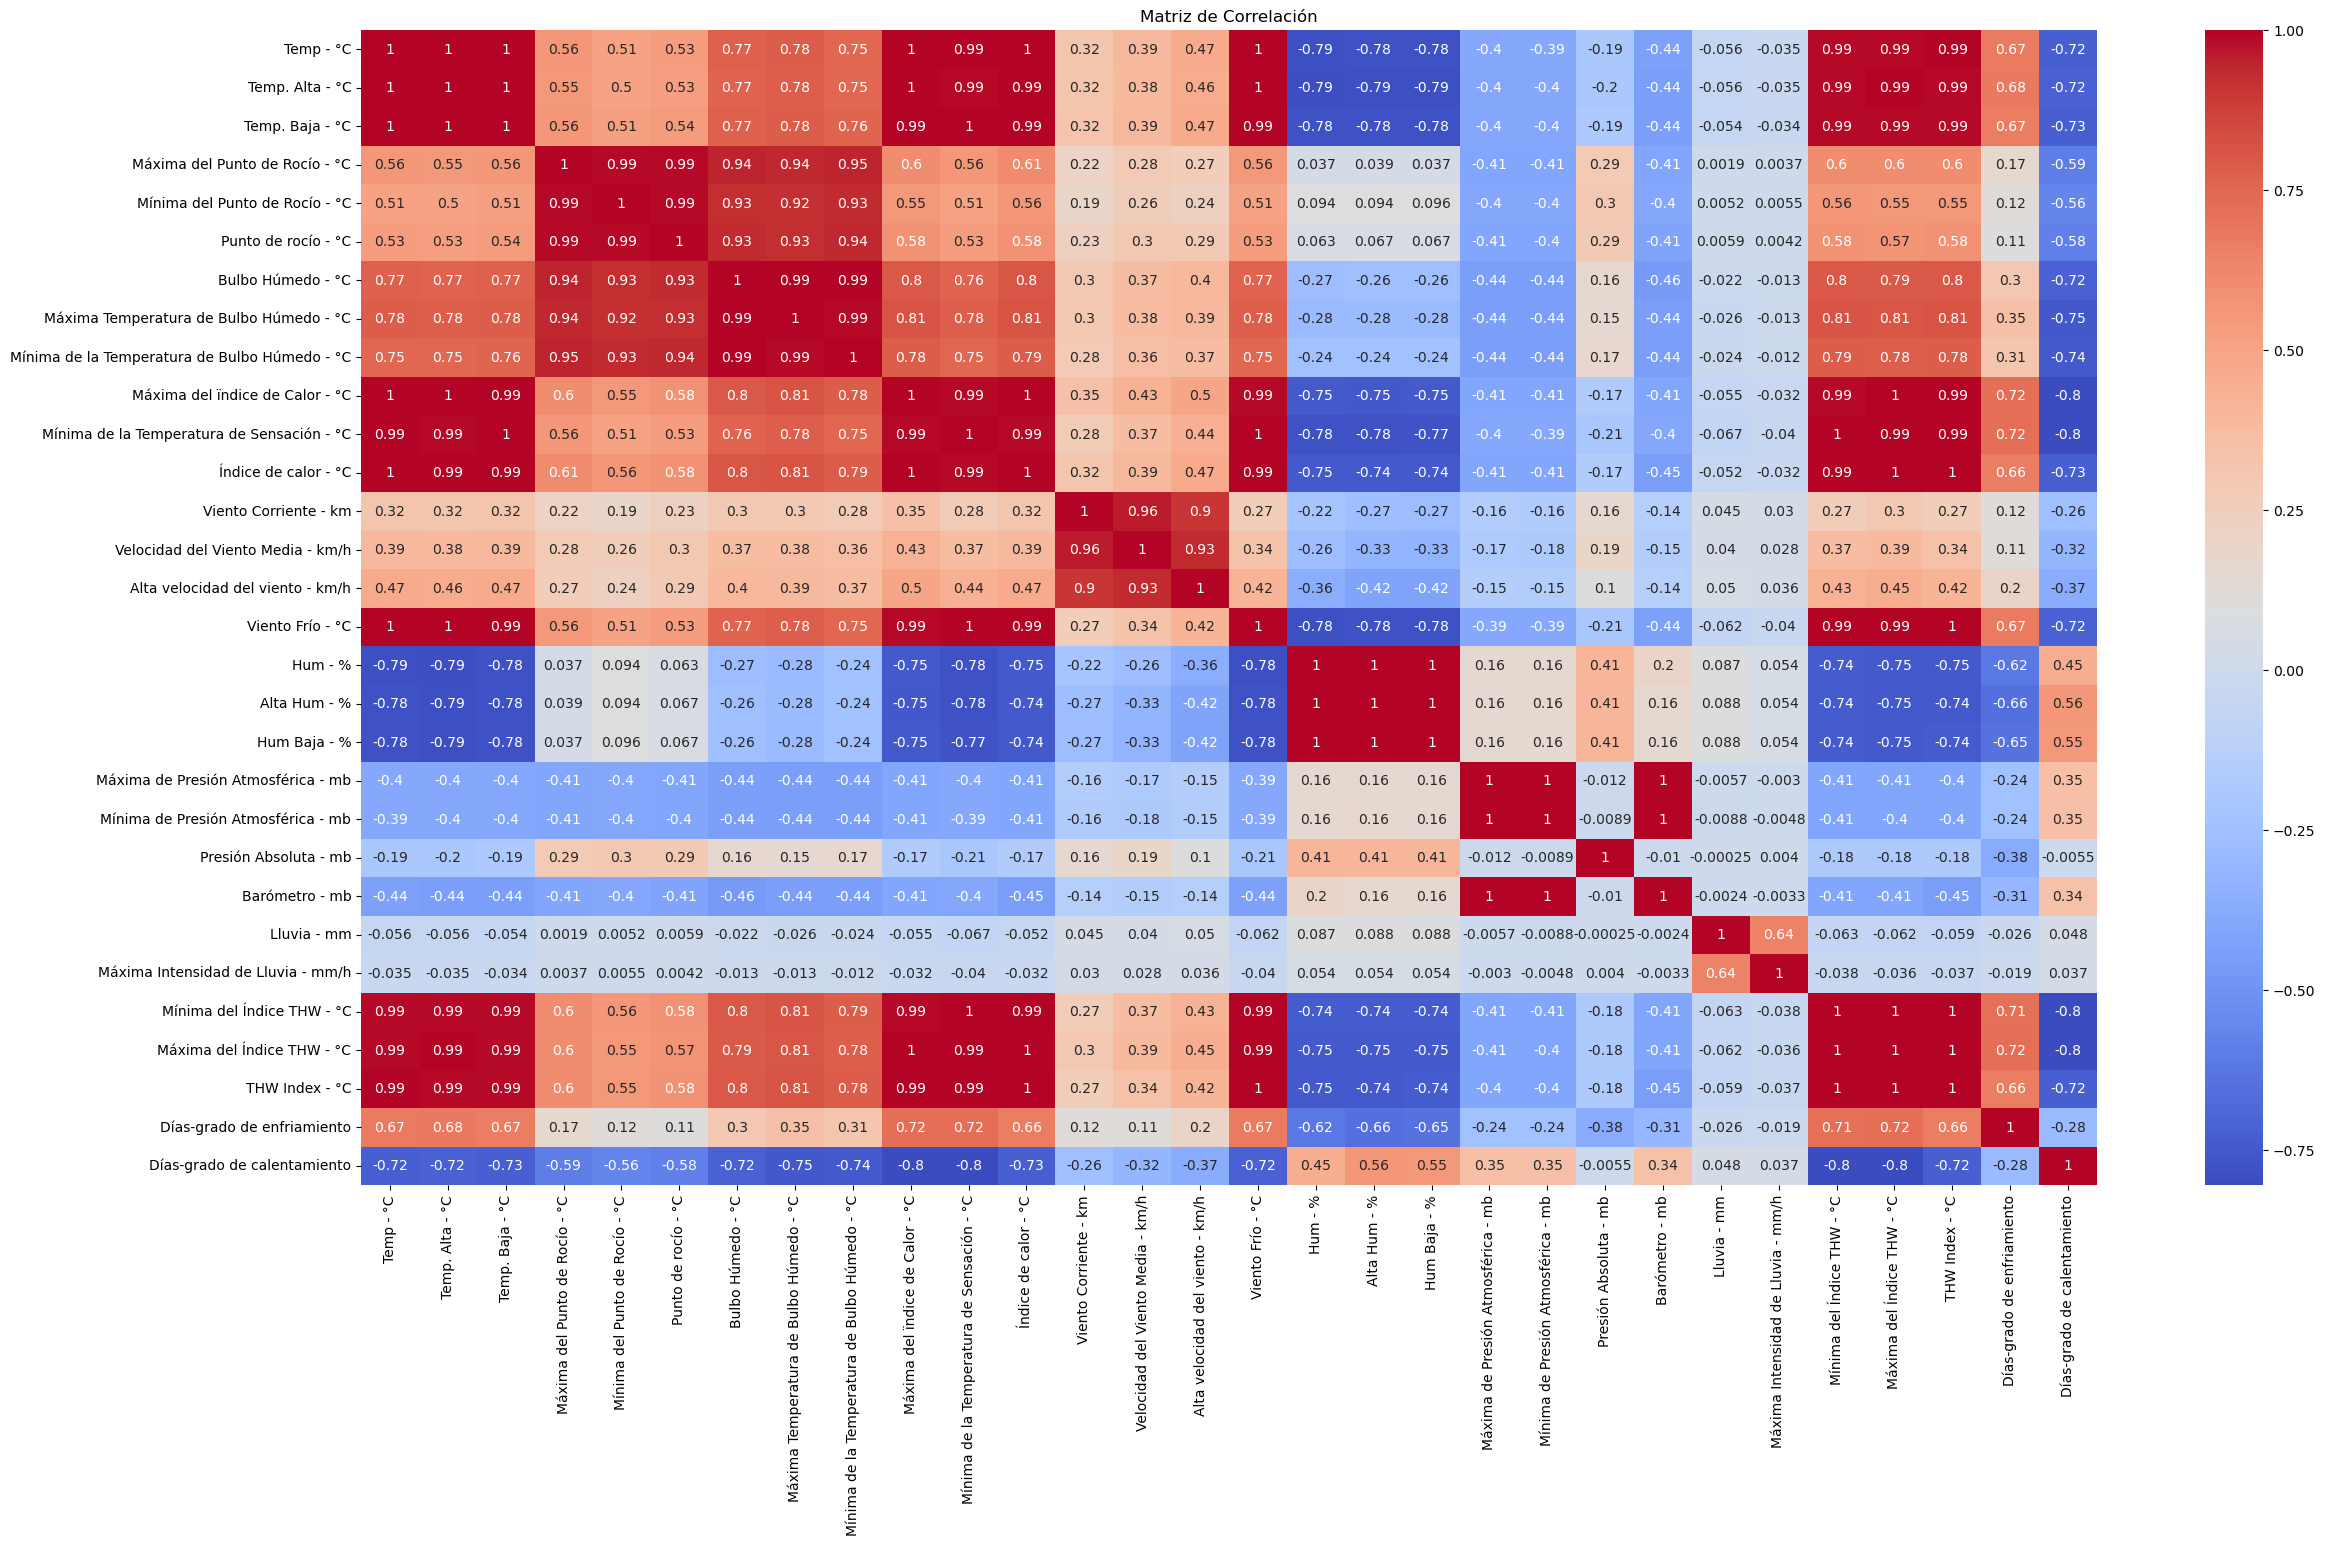

In [56]:
# Analizar cual es la correlacion entre las variables metereologicas para ver si dejamos solo algunas 
# Seleccionar solo columnas numéricas
df_numerico = df_meteorologico.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr = df_numerico.corr()

plt.figure(figsize=(28,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [57]:
# Seleccionamos una variable de cada grupo, asegurando que la correlación entre las otras variables del grupo es alta

columnas_energia = [
    'Date & Time',
    'Estacion',
    'Temp - °C',
    'Punto de rocío - °C',
    'Bulbo Húmedo - °C',
    'Velocidad del Viento Media - km/h',
    'Hum - %',
    'Barómetro - mb',
    'Lluvia - mm', 
    'Días-grado de enfriamiento',
    'Días-grado de calentamiento'
]

df_meteorologico = df_meteorologico[columnas_energia]

In [58]:
print(df_meteorologico.describe())

                         Date & Time      Temp - °C  Punto de rocío - °C  \
count                         328246  326779.000000        326778.000000   
mean   2024-01-23 17:10:23.731591168      14.685797             9.021011   
min              2022-01-01 02:00:00      -5.000000           -16.000000   
25%              2023-07-10 07:15:00      11.000000             7.000000   
50%              2024-03-01 21:07:30      14.000000             9.000000   
75%              2024-10-01 15:15:00      18.000000            12.000000   
max              2025-05-14 16:45:00      39.000000            19.000000   
std                              NaN       6.241020             3.804016   

       Bulbo Húmedo - °C  Velocidad del Viento Media - km/h        Hum - %  \
count      326778.000000                      326813.000000  326795.000000   
mean           10.801660                           3.926386      72.592124   
min            -7.000000                           0.000000       5.000000   
25%

In [59]:
# Calcular el total de registros (filas)
total_registros = len(df_meteorologico)
print(total_registros)

# Mostrar el número de valores nulos por columna
valores_nulos = df_meteorologico.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (valores_nulos / total_registros) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)

328246

Valores nulos por columna:
Date & Time                             0
Estacion                                0
Temp - °C                            1467
Punto de rocío - °C                  1468
Bulbo Húmedo - °C                    1468
Velocidad del Viento Media - km/h    1433
Hum - %                              1451
Barómetro - mb                          0
Lluvia - mm                             1
Días-grado de enfriamiento           1467
Días-grado de calentamiento          1467
dtype: int64

Porcentaje de valores nulos por columna:
Date & Time                          0.000000
Estacion                             0.000000
Temp - °C                            0.446921
Punto de rocío - °C                  0.447226
Bulbo Húmedo - °C                    0.447226
Velocidad del Viento Media - km/h    0.436563
Hum - %                              0.442047
Barómetro - mb                       0.000000
Lluvia - mm                          0.000305
Días-grado de enfriamiento        

In [60]:
import pandas as pd

df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'])

# Función para procesar los valores nulos
def get_null_summary(df, time_threshold=pd.Timedelta(minutes=15)):
    null_summary = []
    
    # Agrupar por estación
    for station in df['Estacion'].unique():
        station_df = df[df['Estacion'] == station].sort_values('Date & Time')
        
        # Detectar las filas con valores nulos
        null_mask = station_df.isnull()
        
        # Iterar sobre las columnas
        for column in station_df.columns:
            null_dates = station_df[null_mask[column]].index
            if len(null_dates) > 0:
                grouped_nulls = []
                current_group = [null_dates[0]]  # Iniciar un grupo con el primer valor nulo
                
                for i in range(1, len(null_dates)):
                    # Comprobar si la diferencia de tiempo entre los nulos consecutivos es menor a 15 minutos
                    time_diff = station_df.loc[null_dates[i], 'Date & Time'] - station_df.loc[null_dates[i-1], 'Date & Time']
                    if time_diff <= time_threshold:
                        current_group.append(null_dates[i])  # Añadir al grupo si están dentro del umbral de tiempo
                    else:
                        # Si la diferencia es mayor que 15 minutos, guardar el grupo y empezar uno nuevo
                        grouped_nulls.append(current_group)
                        current_group = [null_dates[i]]
                
                if current_group:
                    grouped_nulls.append(current_group)
                
                # Crear los registros para cada grupo de nulos
                for group in grouped_nulls:
                    start_date = station_df.loc[group[0], 'Date & Time']
                    end_date = station_df.loc[group[-1], 'Date & Time']
                    prev_date = station_df.iloc[station_df.index.get_loc(group[0]) - 1]['Date & Time'] if station_df.index.get_loc(group[0]) > 0 else None
                    next_date = station_df.iloc[station_df.index.get_loc(group[-1]) + 1]['Date & Time'] if station_df.index.get_loc(group[-1]) + 1 < len(station_df) else None
                    
                    null_summary.append({
                        'Estacion': station,
                        'Fecha inicio valor nulo': start_date,
                        'Fecha fin valor nulo': end_date,
                        'Número de registros': len(group),
                        'Variable(s) con nulos': column,
                        'Fecha anterior': prev_date,
                        'Fecha posterior': next_date
                    })
                    
    return pd.DataFrame(null_summary)

# Obtener el resumen de valores nulos agrupados por 15 minutos
null_data = get_null_summary(df_meteorologico)

# Guardar el DataFrame en un archivo CSV
null_data.to_csv('resumen_valores_nulos_agrupados.csv', index=False)

## **Corregir valores nulos**

In [62]:
# Seleccionar solo las columnas numéricas
df_numerico = df_meteorologico.select_dtypes(include=['float64', 'int64'])

# Interpolar los valores nulos en las columnas numéricas
df_meteorologico_interpolado = df_numerico.interpolate(method='linear', axis=0)

# reemplazar columnas originales del DataFrame con los valores interpolados
df_meteorologico[df_numerico.columns] = df_meteorologico_interpolado

print(df_meteorologico.head())


          Date & Time   Estacion  Temp - °C  Punto de rocío - °C  \
0 2022-01-01 02:00:00  Los Andes       11.0                  8.0   
1 2022-01-01 02:30:00  Los Andes       10.0                  8.0   
2 2022-01-01 03:00:00  Los Andes       10.0                  7.0   
3 2022-01-01 03:30:00  Los Andes       10.0                  7.0   
4 2022-01-01 04:00:00  Los Andes        9.0                  7.0   

   Bulbo Húmedo - °C  Velocidad del Viento Media - km/h  Hum - %  \
0                9.0                                0.0     83.0   
1                9.0                                0.0     85.0   
2                8.0                                0.0     85.0   
3                8.0                                0.0     86.0   
4                8.0                                0.0     87.0   

   Barómetro - mb  Lluvia - mm  Días-grado de enfriamiento  \
0          1010.9          0.0                         0.0   
1          1010.8          0.0                         0.0

In [63]:
# Mostrar el número de valores nulos por columna
valores_nulos = df_meteorologico.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
Date & Time                          0
Estacion                             0
Temp - °C                            0
Punto de rocío - °C                  0
Bulbo Húmedo - °C                    0
Velocidad del Viento Media - km/h    0
Hum - %                              0
Barómetro - mb                       0
Lluvia - mm                          0
Días-grado de enfriamiento           0
Días-grado de calentamiento          0
dtype: int64


## **Tratamiento outliers**

#### Outliers 'Temp - °C'

In [66]:
import pandas as pd

df_meteorologico['Date & Time'] = pd.to_datetime(df_meteorologico['Date & Time'], errors='coerce')

# Crear columna con la estación del año
def obtener_estacion_del_ano(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'verano'
    elif mes in [3, 4, 5]:
        return 'otoño'
    elif mes in [6, 7, 8]:
        return 'invierno'
    elif mes in [9, 10, 11]:
        return 'primavera'

df_meteorologico['Estacion_Anual'] = df_meteorologico['Date & Time'].apply(obtener_estacion_del_ano)

# Agrupar por ubicación y estación del año, y calcular min y max
temp_estadisticas = df_meteorologico.groupby(['Estacion', 'Estacion_Anual'])['Temp - °C'].agg(['min', 'max']).reset_index()

# Mostrar resultados
print(temp_estadisticas)

     Estacion Estacion_Anual   min   max
0       Baron       invierno   5.0  31.0
1       Baron          otoño   7.0  32.0
2       Baron      primavera   7.0  31.0
3       Baron         verano  10.0  33.0
4     Curauma       invierno  -4.0  29.0
5     Curauma          otoño  -3.0  29.0
6     Curauma      primavera   2.0  28.0
7     Curauma         verano   5.0  32.0
8     La Cruz       invierno   0.0  31.0
9     La Cruz          otoño   1.0  33.0
10    La Cruz      primavera   2.0  36.0
11    La Cruz         verano   4.0  38.0
12  Los Andes       invierno  -5.0  32.0
13  Los Andes          otoño  -3.0  36.0
14  Los Andes      primavera  -3.0  36.0
15  Los Andes         verano   6.0  39.0


####  Outliers Bulbo Húmedo - °C

In [68]:
# Agrupar por estación meteorológica y estación del año
bulbo_estadisticas = df_meteorologico.groupby(['Estacion', 'Estacion_Anual'])['Bulbo Húmedo - °C'].agg(['min', 'max']).reset_index()

# Mostrar resultado
print(bulbo_estadisticas)

     Estacion Estacion_Anual  min   max
0       Baron       invierno  3.0  18.0
1       Baron          otoño  5.0  19.0
2       Baron      primavera  5.0  18.0
3       Baron         verano  8.0  20.0
4     Curauma       invierno -4.0  17.0
5     Curauma          otoño -4.0  19.0
6     Curauma      primavera  1.0  17.0
7     Curauma         verano  5.0  20.0
8     La Cruz       invierno  0.0  18.0
9     La Cruz          otoño  0.0  20.0
10    La Cruz      primavera  2.0  18.0
11    La Cruz         verano  4.0  21.0
12  Los Andes       invierno -7.0  16.0
13  Los Andes          otoño -4.0  20.0
14  Los Andes      primavera -7.0  22.0
15  Los Andes         verano  3.0  22.0


#### Outliers Velocidad del Viento Media - km/h

In [70]:
df_meteorologico['Velocidad del Viento Media - km/h'] = pd.to_numeric(
    df_meteorologico['Velocidad del Viento Media - km/h'], errors='coerce'
)

# Agrupar por estación meteorológica y calcular min y max
viento_estadisticas = df_meteorologico.groupby('Estacion')['Velocidad del Viento Media - km/h'].agg(['min', 'max']).reset_index()

# Mostrar resultados
print(viento_estadisticas)

    Estacion  min   max
0      Baron  0.0  53.0
1    Curauma  0.0  28.0
2    La Cruz  0.0  17.0
3  Los Andes  0.0  28.0


#### Outliers Hum - %

In [72]:
df_meteorologico['Hum - %'] = pd.to_numeric(df_meteorologico['Hum - %'], errors='coerce')

# Agrupar por estación y calcular min y max
humedad_estadisticas = df_meteorologico.groupby('Estacion')['Hum - %'].agg(['min', 'max']).reset_index()

# Mostrar resultados
print(humedad_estadisticas)

    Estacion   min    max
0      Baron  20.0   97.0
1    Curauma  13.0  100.0
2    La Cruz  14.0   99.0
3  Los Andes   5.0   96.0


#### Outliers Barómetro - mb

In [74]:
df_meteorologico['Barómetro - mb'] = pd.to_numeric(df_meteorologico['Barómetro - mb'], errors='coerce')

# Calcular mínimo y máximo por estación
barometro_estadisticas = df_meteorologico.groupby('Estacion')['Barómetro - mb'].agg(['min', 'max']).reset_index()

# Mostrar los resultados
print(barometro_estadisticas.sort_values('Estacion'))

    Estacion     min     max
0      Baron  1003.4  1131.6
1    Curauma  1006.2  1029.4
2    La Cruz  1005.8  1028.9
3  Los Andes  1002.4  1033.3


In [75]:
# Marcar como NaN solo los outliers > 1050
df_meteorologico.loc[df_meteorologico['Barómetro - mb'] > 1050, 'Barómetro - mb'] = pd.NA

#### Outliers Lluvia - mm

In [77]:
df_meteorologico['Lluvia - mm'] = pd.to_numeric(df_meteorologico['Lluvia - mm'], errors='coerce')

# Calcular el mínimo y máximo por Estación y Estación_Anual
lluvia_stats = (
    df_meteorologico
    .groupby(['Estacion', 'Estacion_Anual'])['Lluvia - mm']
    .agg(['min', 'max'])
    .reset_index()
)

# Mostrar resultados
print(lluvia_stats)

     Estacion Estacion_Anual  min  max
0       Baron       invierno  0.0  7.1
1       Baron          otoño  0.0  4.8
2       Baron      primavera  0.0  7.9
3       Baron         verano  0.0  1.0
4     Curauma       invierno  0.0  8.6
5     Curauma          otoño  0.0  6.3
6     Curauma      primavera  0.0  4.8
7     Curauma         verano  0.0  0.3
8     La Cruz       invierno  0.0  2.4
9     La Cruz          otoño  0.0  0.8
10    La Cruz      primavera  0.0  0.8
11    La Cruz         verano  0.0  0.2
12  Los Andes       invierno  0.0  2.8
13  Los Andes          otoño  0.0  5.6
14  Los Andes      primavera  0.0  3.0
15  Los Andes         verano  0.0  4.8


#### Outliers días-grado de enfriamiento

In [79]:
df_meteorologico['Días-grado de enfriamiento'] = pd.to_numeric(df_meteorologico['Días-grado de enfriamiento'], errors='coerce')

# Agrupar y calcular mínimos y máximos por zona y estación del año
enfriamiento_stats = (
    df_meteorologico
    .groupby(['Estacion', 'Estacion_Anual'])['Días-grado de enfriamiento']
    .agg(['min', 'max'])
    .reset_index()
)

# Mostrar resultados
print(enfriamiento_stats)

     Estacion Estacion_Anual  min       max
0       Baron       invierno  0.0  0.130000
1       Baron          otoño  0.0  0.142000
2       Baron      primavera  0.0  0.131000
3       Baron         verano  0.0  0.148000
4     Curauma       invierno  0.0  0.112000
5     Curauma          otoño  0.0  0.176667
6     Curauma      primavera  0.0  0.095000
7     Curauma         verano  0.0  0.144000
8     La Cruz       invierno  0.0  0.053000
9     La Cruz          otoño  0.0  0.051000
10    La Cruz      primavera  0.0  0.060000
11    La Cruz         verano  0.0  0.068000
12  Los Andes       invierno  0.0  0.289000
13  Los Andes          otoño  0.0  0.368000
14  Los Andes      primavera  0.0  0.346000
15  Los Andes         verano  0.0  0.434000


#### Outliers Días-grado de calentamiento

In [81]:
# Asegurar que la columna es numérica
df_meteorologico['Días-grado de calentamiento'] = pd.to_numeric(
    df_meteorologico['Días-grado de calentamiento'], errors='coerce'
)

# Agrupar por zona y estación del año para obtener valores extremos
calentamiento_stats = (
    df_meteorologico
    .groupby(['Estacion', 'Estacion_Anual'])['Días-grado de calentamiento']
    .agg(['min', 'max'])
    .reset_index()
)

print(calentamiento_stats)

     Estacion Estacion_Anual  min       max
0       Baron       invierno  0.0  0.149000
1       Baron          otoño  0.0  0.121000
2       Baron      primavera  0.0  0.123000
3       Baron         verano  0.0  0.083000
4     Curauma       invierno  0.0  0.229000
5     Curauma          otoño  0.0  0.449667
6     Curauma      primavera  0.0  0.173000
7     Curauma         verano  0.0  0.134000
8     La Cruz       invierno  0.0  0.148000
9     La Cruz          otoño  0.0  0.061000
10    La Cruz      primavera  0.0  0.057000
11    La Cruz         verano  0.0  0.049000
12  Los Andes       invierno  0.0  0.483000
13  Los Andes          otoño  0.0  0.453000
14  Los Andes      primavera  0.0  0.448000
15  Los Andes         verano  0.0  0.266000


## **Registros faltantes**

In [83]:
import pandas as pd

# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2023-06-24 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Crear una función para agregar los registros faltantes
def agregar_registros_faltantes(df):
    df['Date & Time'] = pd.to_datetime(df['Date & Time'])

    # Filtrar el DataFrame para que solo tenga los registros entre fecha_inicio y fecha_fin
    df = df[(df['Date & Time'] >= fecha_inicio) & (df['Date & Time'] <= fecha_fin)]
    
    # Crear un rango de fechas para cada estación
    estaciones = df['Estacion'].unique()
    registros_faltantes = []

    for estacion in estaciones:
        # Filtrar el DataFrame por estación
        df_estacion = df[df['Estacion'] == estacion]
        
        # Crear el rango de fechas para la estación (cada 15 minutos)
        fecha_min = df_estacion['Date & Time'].min()
        fecha_max = df_estacion['Date & Time'].max()
        rango_fechas = pd.date_range(fecha_min, fecha_max, freq='15T')
        
        # Identificar las fechas que faltan
        fechas_faltantes = rango_fechas.difference(df_estacion['Date & Time'])
        
        for fecha in fechas_faltantes:
            # Crear el registro con la fecha faltante y valores vacíos
            nuevo_registro = {
                'Date & Time': fecha,
                'Estacion': estacion,
                'Temp - °C': None,
                'Punto de rocío - °C': None,
                'Bulbo Húmedo - °C': None,
                'Velocidad del Viento Media - km/h': None,
                'Hum - %': None,
                'Barómetro - mb': None,
                'Lluvia - mm': None,
                'Días-grado de enfriamiento': None,
                'Días-grado de calentamiento': None
            }
            registros_faltantes.append(nuevo_registro)
    
    # Crear un DataFrame con los registros faltantes
    df_faltantes = pd.DataFrame(registros_faltantes)
    
    # Concatenar el DataFrame original con los registros faltantes
    df_completo = pd.concat([df, df_faltantes], ignore_index=True)
    
    # Ordenar por fecha para tener los registros en orden cronológico
    df_completo = df_completo.sort_values(by='Date & Time').reset_index(drop=True)
    
    return df_completo

# Llamar a la función para agregar los registros faltantes
df_meteorologico_completo = agregar_registros_faltantes(df_meteorologico)



/var/folders/nt/k8m7d43555xfsngm0zdr9pt80000gn/T/ipykernel_46037/620320295.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rango_fechas = pd.date_range(fecha_min, fecha_max, freq='15T')
/var/folders/nt/k8m7d43555xfsngm0zdr9pt80000gn/T/ipykernel_46037/620320295.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo = pd.concat([df, df_faltantes], ignore_index=True)


## **Analizar valores nulos**

In [85]:
import pandas as pd

# Asegurar que la columna de tiempo sea datetime
df_meteorologico_completo['Date & Time'] = pd.to_datetime(df_meteorologico_completo['Date & Time'])

# Variables meteorológicas
vars_meteorologicas = [
    'Temp - °C',
    'Punto de rocío - °C',
    'Bulbo Húmedo - °C',
    'Velocidad del Viento Media - km/h',
    'Hum - %',
    'Barómetro - mb',
    'Lluvia - mm',
    'Días-grado de enfriamiento',
    'Días-grado de calentamiento'
]

# Filtrar filas con al menos un valor nulo
df_nulos = df_meteorologico_completo[df_meteorologico_completo[vars_meteorologicas].isnull().any(axis=1)].copy()

# Ordenar
df_nulos = df_nulos.sort_values(['Estacion', 'Date & Time'])

# Calcular diferencia de tiempo por estación
df_nulos['time_diff'] = df_nulos.groupby('Estacion')['Date & Time'].diff()

# Identificar inicio de un nuevo bloque si no es cada 15 minutos
df_nulos['nuevo_bloque'] = (df_nulos['time_diff'] != pd.Timedelta(minutes=15)) | (df_nulos['time_diff'].isna())

# Crear id de bloque secuencial
df_nulos['bloque'] = df_nulos.groupby('Estacion')['nuevo_bloque'].cumsum()

# Obtener variables con nulos en cada fila
df_nulos['Variables_con_nulos'] = df_nulos[vars_meteorologicas].isnull().apply(
    lambda row: [var for var, is_na in zip(vars_meteorologicas, row) if is_na], axis=1
)

# Agrupar por estación y bloque
df_bloques_nulos = df_nulos.groupby(['Estacion', 'bloque']).agg(
    Fecha_inicio=('Date & Time', 'first'),
    Fecha_fin=('Date & Time', 'last'),
    Numero_registros=('Date & Time', 'count'),
    Variables_con_nulos=('Variables_con_nulos', lambda x: sorted(set(var for sublist in x for var in sublist)))
).reset_index(drop=False)

# Formatear variables nulas como string
df_bloques_nulos['Variables_con_nulos'] = df_bloques_nulos['Variables_con_nulos'].apply(lambda x: ', '.join(x))

# Seleccionar columnas finales
df_bloques_nulos = df_bloques_nulos[['Fecha_inicio', 'Fecha_fin', 'Estacion', 'Numero_registros', 'Variables_con_nulos']]

## **Corregir valores nulos**

In [87]:
# Seleccionar solo las columnas numéricas
df_numerico = df_meteorologico_completo.select_dtypes(include=['float64', 'int64'])

# Interpolar los valores nulos en las columnas numéricas
df_meteorologico_interpolado = df_numerico.interpolate(method='linear', axis=0)

df_meteorologico_completo[df_numerico.columns] = df_meteorologico_interpolado

# Verifica el resultado
print(df_meteorologico_completo.head())

          Date & Time   Estacion  Temp - °C  Punto de rocío - °C  \
0 2023-06-24 00:00:00  Los Andes       12.0                 11.0   
1 2023-06-24 00:00:00      Baron       16.0                 15.0   
2 2023-06-24 00:00:00    Curauma       15.0                 14.0   
3 2023-06-24 00:00:00    La Cruz       17.0                 14.0   
4 2023-06-24 00:15:00    Curauma       15.0                 14.0   

   Bulbo Húmedo - °C  Velocidad del Viento Media - km/h  Hum - %  \
0               12.0                                0.0     93.0   
1               16.0                                6.0     92.0   
2               14.0                                0.0     98.0   
3               15.0                                1.0     84.0   
4               14.0                                1.0     98.0   

   Barómetro - mb  Lluvia - mm  Días-grado de enfriamiento  \
0          1023.0          0.6                         0.0   
1          1018.4          0.3                         0.0

In [88]:
# Mostrar el número de valores nulos por columna
valores_nulos = df_meteorologico_completo.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
Date & Time                             0
Estacion                                0
Temp - °C                               0
Punto de rocío - °C                     0
Bulbo Húmedo - °C                       0
Velocidad del Viento Media - km/h       0
Hum - %                                 0
Barómetro - mb                          0
Lluvia - mm                             0
Días-grado de enfriamiento              0
Días-grado de calentamiento             0
Estacion_Anual                       9208
dtype: int64


## **Exportar df a csv final**

In [90]:
# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2023-06-24 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Filtrar el DataFrame para que solo contenga registros entre fecha_inicio y fecha_fin
df_meteorologico_completo = df_meteorologico_completo[(df_meteorologico_completo['Date & Time'] >= fecha_inicio) & (df_meteorologico_completo['Date & Time'] <= fecha_fin)]

In [91]:
df_meteorologico_completo.shape

(251140, 12)

In [92]:
# Exportar a CSV
df_meteorologico_completo.to_csv("df_meteorologico.csv", index=False, encoding='utf-8-sig', sep=';')